# Sonora

Después de haber trabajado con México, vamos a seguir con el estado de Sonora. 

In [6]:
import os
import zipfile

mexico_data = "..\\..\\medium_data\\mexico_data"

folder_path = mexico_data + '\\Sonora'
try:
    os.mkdir(folder_path)
except:
    print('Hubo un detalle')


with zipfile.ZipFile(mexico_data + '\\26_sonora.zip', 'r') as cvegeo:
    cvegeo.extractall(folder_path)

sonora_list = os.listdir(folder_path + "\\conjunto_de_datos")
sonora_list


Hubo un detalle


['26a.cpg',
 '26a.dbf',
 '26a.prj',
 '26a.shp',
 '26a.shx',
 '26ar.cpg',
 '26ar.dbf',
 '26ar.prj',
 '26ar.shp',
 '26ar.shx',
 '26cd.cpg',
 '26cd.dbf',
 '26cd.prj',
 '26cd.shp',
 '26cd.shx',
 '26e.cpg',
 '26e.dbf',
 '26e.prj',
 '26e.shp',
 '26e.shx',
 '26ent.cpg',
 '26ent.dbf',
 '26ent.prj',
 '26ent.shp',
 '26ent.shx',
 '26fm.cpg',
 '26fm.dbf',
 '26fm.prj',
 '26fm.shp',
 '26fm.shx',
 '26l.cpg',
 '26l.dbf',
 '26l.prj',
 '26l.shp',
 '26l.shx',
 '26lpr.cpg',
 '26lpr.dbf',
 '26lpr.prj',
 '26lpr.shp',
 '26lpr.shx',
 '26m.cpg',
 '26m.dbf',
 '26m.prj',
 '26m.shp',
 '26m.shx',
 '26mun.cpg',
 '26mun.dbf',
 '26mun.prj',
 '26mun.shp',
 '26mun.shx',
 '26pe.cpg',
 '26pe.dbf',
 '26pe.prj',
 '26pe.shp',
 '26pe.shx',
 '26pem.cpg',
 '26pem.dbf',
 '26pem.prj',
 '26pem.shp',
 '26pem.shx',
 '26sia.cpg',
 '26sia.dbf',
 '26sia.prj',
 '26sia.shp',
 '26sia.shx',
 '26sil.cpg',
 '26sil.dbf',
 '26sil.prj',
 '26sil.shp',
 '26sil.shx',
 '26sip.cpg',
 '26sip.dbf',
 '26sip.prj',
 '26sip.shp',
 '26sip.shx',
 '26ti.cpg

Una vez tengamos los archivos de Sonora en su carpeta. Repetimos el proceso visto en México. 

In [8]:
import fiona
import geopandas as gpd

geo_path_base = "..\\..\\medium_data\\mexico_data\\Sonora\\conjunto_de_datos"
geo_paths = []
for file in sonora_list:
    if file.endswith(".shp"):
        geo_paths.append(os.path.join(geo_path_base, file))


def cvegeo(shape):
    municipies = fiona.open(shape)
    df = gpd.GeoDataFrame.from_features([feature for feature in municipies])
    # Get the order of the fields in the Fiona Collection; add geometry to the end
    columns = list(municipies.meta["schema"]["properties"]) + ["geometry"]
    # Re-order columns in the correct order
    df = df[columns]
    return df

sonora_cvegeo = cvegeo(geo_paths[9])

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

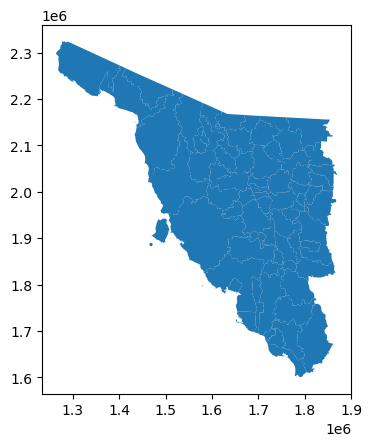

In [10]:
sonora = sonora_cvegeo.copy()
sonora.plot()

Ahora, vamos a darle un formato más comodo.

In [11]:
sonora['CVEGEO'] = sonora['CVEGEO'].astype(int)
sonora.set_index('CVEGEO',drop = True, inplace = True)
sonora.sort_index(inplace=True)
sonora

,CVE_ENT,CVE_MUN,NOMGEO,geometry
CVEGEO,,,,
26001,26,001,Aconchi,"POLYGON ((1716891.114 1996951.730, 1719444.516..."
26002,26,002,Agua Prieta,"POLYGON ((1760930.103 2160351.208, 1767001.040..."
26003,26,003,Álamos,"POLYGON ((1821256.173 1760798.494, 1821779.334..."
26004,26,004,Altar,"POLYGON ((1537545.873 2210751.842, 1540624.445..."
26005,26,005,Arivechi,"POLYGON ((1805489.050 1894518.539, 1808834.835..."
...,...,...,...,...
26068,26,068,Villa Pesqueira,"POLYGON ((1722816.055 1952950.532, 1725062.048..."
26069,26,069,Yécora,"POLYGON ((1803224.743 1856531.064, 1803220.789..."
26070,26,070,General Plutarco Elías Calles,"POLYGON ((1414999.834 2265826.465, 1417760.302..."


In [12]:
sonora = sonora[['NOMGEO','geometry']]

def sonora_codes(code: int|str):
    if type(code) == int:
        code = code % 72 + 1
        code += 26000 
        return sonora.loc[code, 'NOMGEO']
    Municipios = list(sonora['NOMGEO'])
    mun_id = Municipios.index(code)
    return mun_id

sonora_codes(1000)

'Tubutama'

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

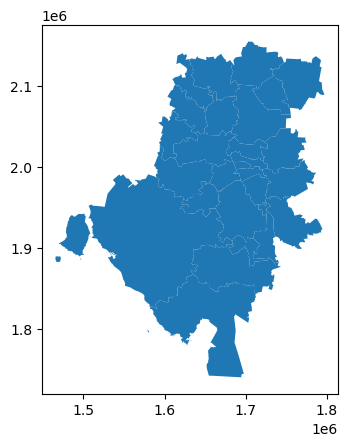

In [30]:
text = "Aconchi, Arizpe, Bacoachi, Banámichi, Baviácora, Benjamín Hill, Cananea, Carbó, Cucurpe, Cumpas, Fronteras, Guaymas, Hermosillo, Huépac, Imuris, La Colorada, Magdalena, Mazatán, Moctezuma, Opodepe, Rayón, San Felipe de Jesús, San Miguel de Horcasitas, San Pedro de la Cueva, Santa Ana, Ures y Villa Pesqueira"
text = text.split(', ')
text2 = text[-1]
text2 = text2.split(' y ')

rio_sonora = text[:-1] + text2
text = 'Ures, Baviácora, Aconchi, San Felipe de Jesús, Huépac, Banámichi, Arizpe, Bacoachi'
rio_sonora_prota = text.split(', ')

rio_codes = [26001 + sonora_codes(r) for r in rio_sonora]
rio_prota = [26001 + sonora_codes(r) for r in rio_sonora_prota]
sonora.loc[rio_codes, 'RioSonora'] = 'Cuenca Rio Sonora'
sonora.loc[rio_prota, 'RioSonora'] = 'Ruta Rio Sonora'
rio_map = sonora.loc[rio_codes]


rio_map.plot()


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:627: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


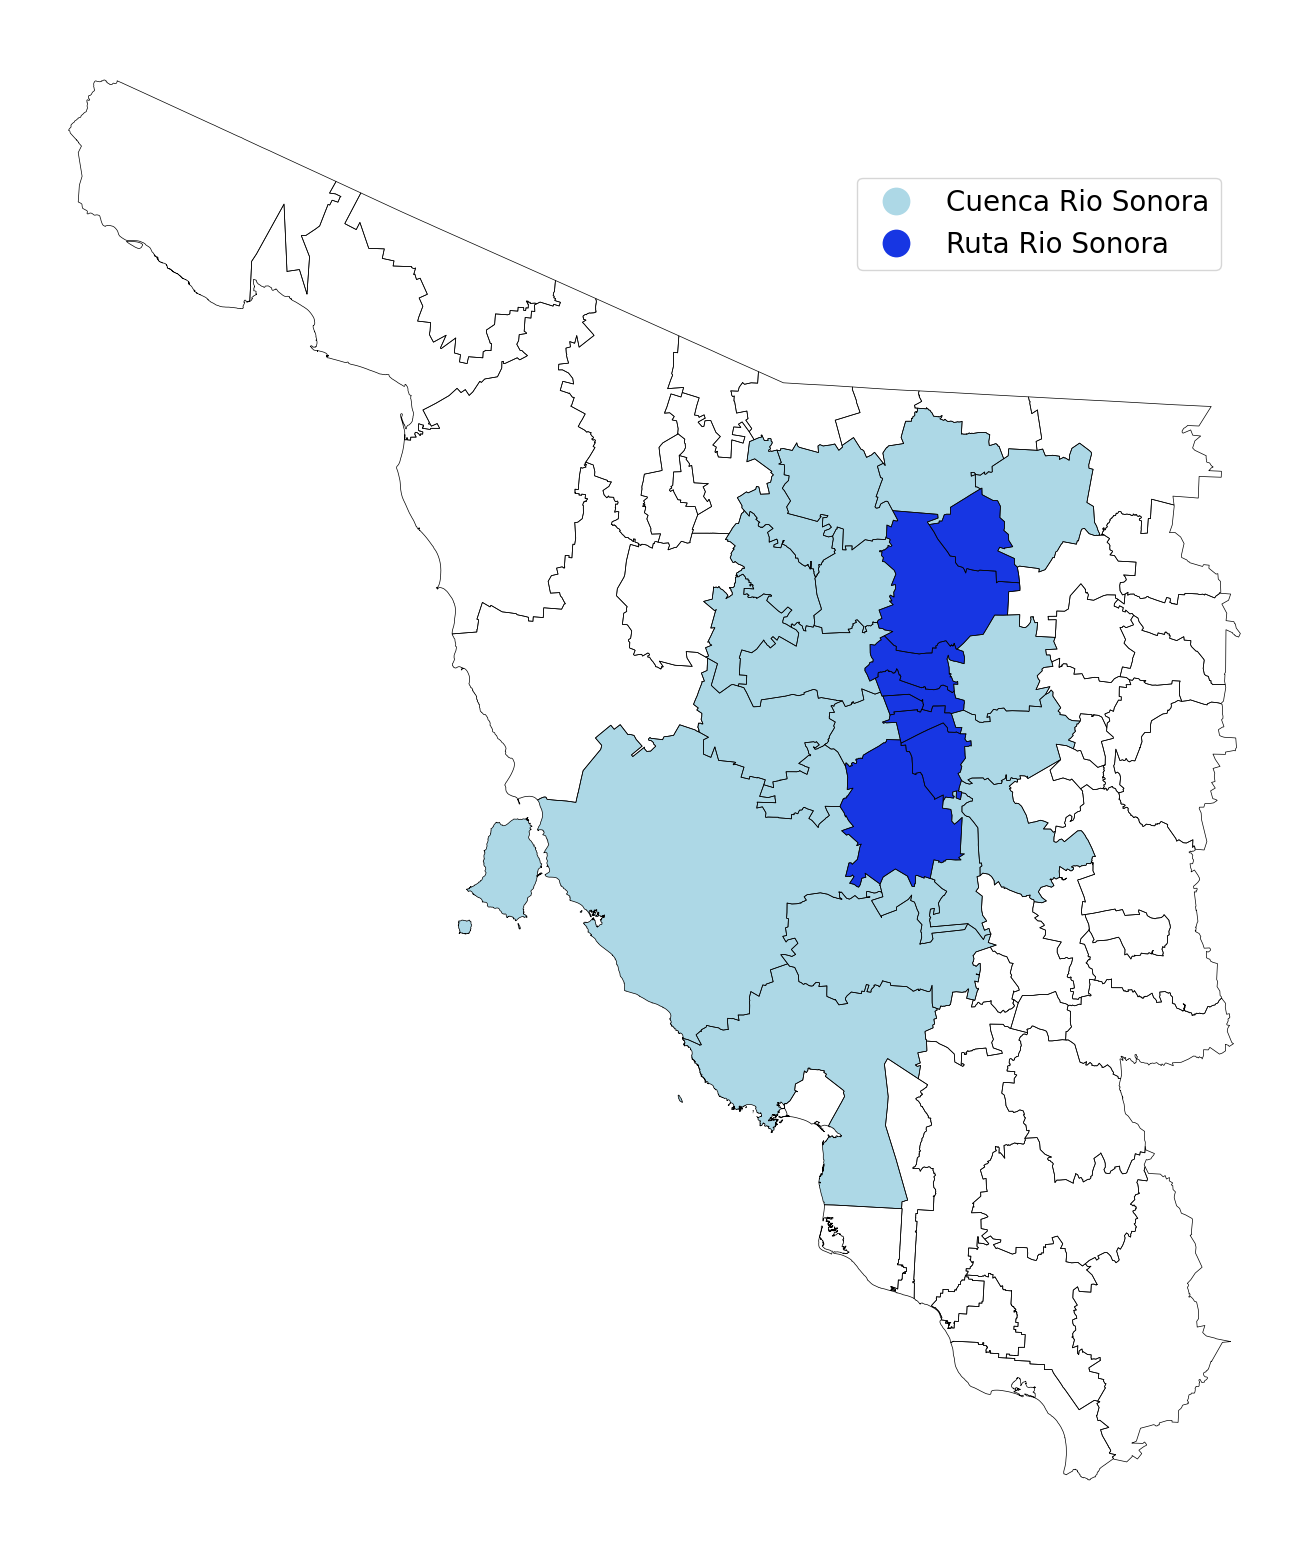

In [35]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize = (20,20))
# Añade recuadro 1
 #axins = ax.inset_axes([0, 0, 0.1, 0.1])
# Añade recuadro 2
# axins2 = ax.inset_axes([0, 0, 0.1, 0.1])


s = ListedColormap(['lightblue','lightgray','#1736E3' ])
# Gráfica principal
sonora.plot('RioSonora', ax = ax, colormap=s, legend = True, categorical = True, legend_kwds = {
                        'fontsize': 20,
                        'markerscale':2,
                        'bbox_to_anchor': (0.95, 0.9)
                    })
sonora.boundary.plot(lw=0.5, color='black', ax=ax)

# Gráfica recuadro 1
# rio_map.plot(ax=axins)
# rio_map.boundary.plot(lw=0.25, color='k', ax=axins)
# rio_map.boundary.plot(lw=1, color='red', ax=axins)

# Gráfica recuadro 2
# rio_map.plot(ax=axins)
# rio_map.boundary.plot(lw=0.25, color='k', ax=axins2)
# rio_map.boundary.plot(lw=1, color='red', ax=axins2)
# limita área a mostrar recuadro 1 y 2
# axins.set(ylabel='', xlabel='', xlim=(1.5e6, 1.7e6), ylim=(1.6e6, 1.8e6), xticks=[], yticks=[], title='Oaxaca')
# axins2.set(ylabel='', xlabel='', xlim=(1.5e6, 1.7e6), ylim=(1.6e6, 1.8e6), xticks=[], yticks=[], title='Guanajuato')


# Elimina marco de la gráfica principal
ax.set_axis_off()
# Establece líneas de los recuadros a la gráfica principal
# ax.indicate_inset_zoom(axins)
# ax.indicate_inset_zoom(axins2)

# Tamaño de la gráfica final
#fig.set_size_inches(12, 8)

In [16]:
import pandas as pd

data = pd.read_excel('..\\..\\raw_data\\Tablas.xlsx', sheet_name=None)
sheets = list(data.keys())

fis_mun = data['Hoja5']
fis_mun = fis_mun.iloc[3:-1,1:]
fis_mun.columns = fis_mun.iloc[0,:]
fis_mun = fis_mun.iloc[1:,]
fis_mun.reset_index(drop=True,inplace=True)
mun_t = fis_mun.iloc[-1,1]
fis_mun['ANUAL %'] = fis_mun['ANUAL'] / mun_t * 100
fis_mun_data = fis_mun[['MUNICIPIOS','ANUAL','ANUAL %']].copy()
fis_mun_data['ANUAL MDP'] = fis_mun_data['ANUAL'] / 1e6
cvegeo_mun = [str(26001 + i) for i in range(72)]
fis_mun_data['CVEGEO']  = cvegeo_mun + ['*']
fis_mun_data.set_index('CVEGEO',drop=True,inplace=True)

fis_mun_data

3,MUNICIPIOS,ANUAL,ANUAL %,ANUAL MDP
CVEGEO,,,,
26001,ACONCHI,3787227,0.453045,3.787227
26002,AGUA PRIETA,17544854,2.098794,17.544854
26003,ALAMOS,32564309,3.895489,32.564309
26004,ALTAR,4151214,0.496587,4.151214
26005,ARIVECHI,3306710,0.395564,3.30671
...,...,...,...,...
26069,URES,2440641,0.29196,2.440641
26070,VILLA HIDALGO,1406408,0.168241,1.406408
26071,VILLA PESQUEIRA,1544238,0.184729,1.544238


In [17]:
sonora['ANUAL %'] = list(fis_mun_data['ANUAL %'])[:-1]
sonora

,NOMGEO,geometry,RioSonora,ANUAL %
CVEGEO,,,,
26001,Aconchi,"POLYGON ((1716891.114 1996951.730, 1719444.516...",Ruta Rio Sonora,0.453045
26002,Agua Prieta,"POLYGON ((1760930.103 2160351.208, 1767001.040...",NaN,2.098794
26003,Álamos,"POLYGON ((1821256.173 1760798.494, 1821779.334...",NaN,3.895489
26004,Altar,"POLYGON ((1537545.873 2210751.842, 1540624.445...",NaN,0.496587
26005,Arivechi,"POLYGON ((1805489.050 1894518.539, 1808834.835...",NaN,0.395564
...,...,...,...,...
26068,Villa Pesqueira,"POLYGON ((1722816.055 1952950.532, 1725062.048...",NaN,0.134988
26069,Yécora,"POLYGON ((1803224.743 1856531.064, 1803220.789...",NaN,0.291960
26070,General Plutarco Elías Calles,"POLYGON ((1414999.834 2265826.465, 1417760.302...",NaN,0.168241


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


'\nfor i in range(4):\n    for j in range(18):\n        g = str(sonora.index[4 * j + i]-26000)\n        if len(g) == 1:\n            g = \'0\' + g\n        text_block(g + f": {round(sonora.loc[sonora.index[4 * j + i],\'ANUAL %\'],2)}", (1.3e6 + i * 0.035e6,1.8e6 - j * 0.01e6), ax)\ntext_block(\'Porcentajes por Municipio (%)\', (1.35e6,1.81e6), ax)\nax.set_axis_off()\n'

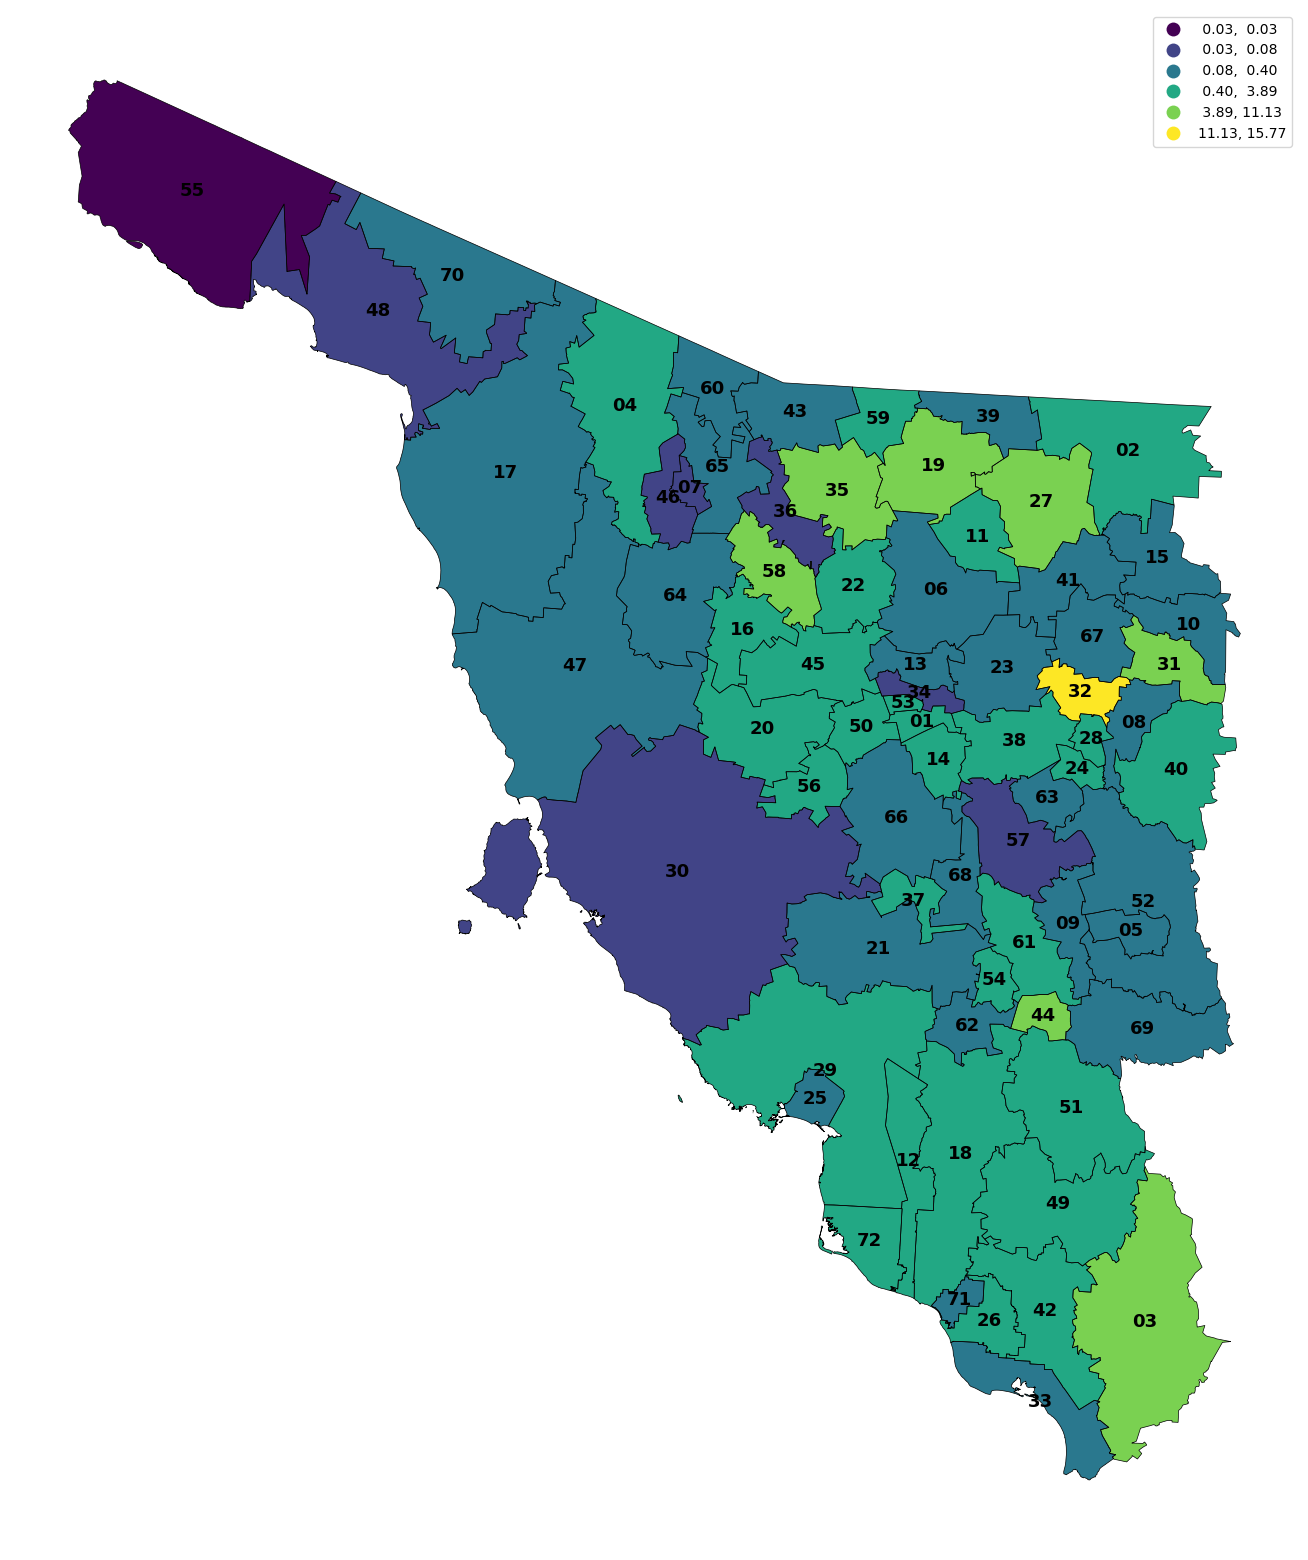

In [25]:
def arrow(text, position, text_position, ax):
    ax.annotate(text, xy=position, xytext=text_position,
                arrowprops=dict(facecolor='k', width=0.1, headwidth=2, headlength = 2),
                ha='center', va='center', fontsize=20,
                xycoords=ax.transAxes, weight = 'bold')
    return text_position

def text_block(content, pos, ax):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=13,
                    horizontalalignment='center', 
                    verticalalignment='center',
                    weight = 'bold')
    return pos 


fis_son, ax = plt.subplots(figsize =(20,20)) 
sonora.plot('ANUAL %',scheme = 'percentiles',legend=True,ax = ax)
sonora.boundary.plot(lw= 0.5, color = 'black', ax = ax)
for id in list(sonora.index):
    g = str(id-26000)
    if len(g) == 1:
        g = '0' + g
    text_block(g, sonora.loc[id,:].geometry.centroid.coords[0], ax)
ax.set_axis_off()
"""
for i in range(4):
    for j in range(18):
        g = str(sonora.index[4 * j + i]-26000)
        if len(g) == 1:
            g = '0' + g
        text_block(g + f": {round(sonora.loc[sonora.index[4 * j + i],'ANUAL %'],2)}", (1.3e6 + i * 0.035e6,1.8e6 - j * 0.01e6), ax)
text_block('Porcentajes por Municipio (%)', (1.35e6,1.81e6), ax)
ax.set_axis_off()
"""